In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

Load data

In [ ]:
features_df = pd.read_csv(r"emg_pca_feature.csv")

LSTM Model

In [ ]:
'''You can try with different LSTM parameters'''
# Load the CSV file
data = features_df

features = data.iloc[:, :-1].values  # Extract features
labels = data.iloc[:, -1].values     # Extract target labels

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  

features = features.reshape((features.shape[0], 1, features.shape[1]))

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Adding dropout for regularization

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add Dense output layer
model.add(Dense(3, activation='softmax'))  # For multi-class classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('trained_lstm_model.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/20


C:\Users\Mued\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6341 - loss: 0.8338 - val_accuracy: 0.7483 - val_loss: 0.5593
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7415 - loss: 0.5699 - val_accuracy: 0.7543 - val_loss: 0.5326
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7538 - loss: 0.5435 - val_accuracy: 0.7598 - val_loss: 0.5228
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 0.5219 - val_accuracy: 0.7624 - val_loss: 0.5110
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7687 - loss: 0.5216 - val_accuracy: 0.7701 - val_loss: 0.4995
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7747 - loss: 0.5022 - val_accuracy: 0.7773 - val_loss: 0.4896
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.4843 - val_accuracy: 0.7794 - val_loss: 0.4831
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7806 - loss: 0.4945 - val_accuracy: 0.7841 - val_

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.4139
Test Loss: 0.4142485558986664
Test Accuracy: 0.8198567032814026


SVM Model

Feature names: ['AAC', 'SSI', 'IEMG', 'STD', 'RMS', 'MAV', 'Log Detector', 'WAMP']
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END ......................C=0.1, gamma=0.

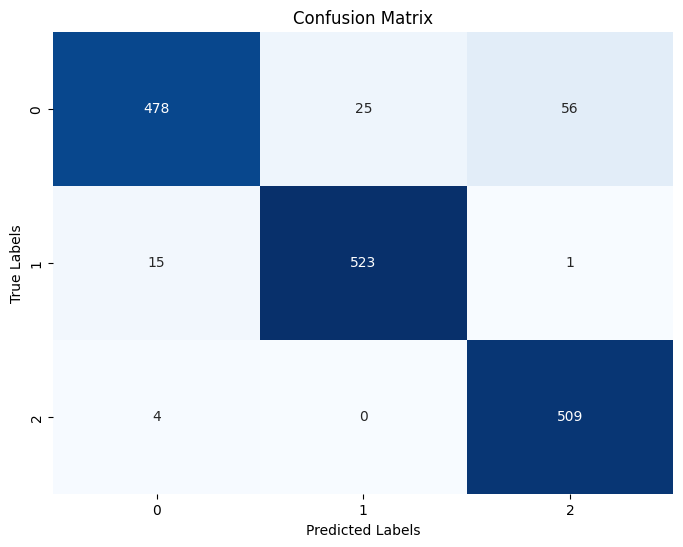

In [ ]:
X = features_df.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = features_df['Label']

print("Feature names:", X.columns.tolist())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the GridSearchCV with SVM
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model with the best parameters found
grid.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid.best_params_}")

# Make predictions on the test set
y_pred = grid.predict(X_test_scaled)

# Save the trained model
model_path = 'svm_model.joblib'
joblib.dump(grid.best_estimator_, model_path)
print(f'Model saved to {model_path}')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy of the SVM model: {accuracy:.4f}')
print(f"Precision of the SVM model: {precision:.4f}")
print(f"Recall of the SVM model: {recall:.4f}")
print(f"F1 Score of the SVM model: {f1:.4f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
